Deutsch-Jozsa Circuit for 3 bits:


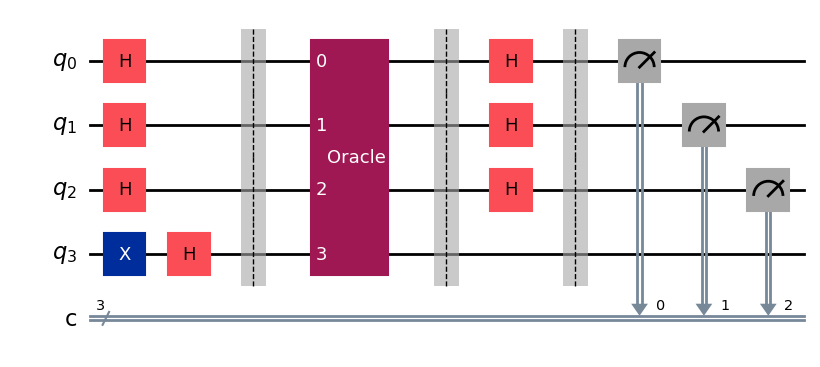

AerError: 'unknown instruction: circuit-51'

In [2]:
# --- Day 10: Deutsch-Jozsa Algorithm ---
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# 1. Define the Oracle (The Black Box)
# Let's create a BALANCED oracle for 3 qubits.
# A simple way to make it balanced is to wrap the CNOTs with X-gates or just use CNOTs.
def dj_oracle(n):
    # We need n input qubits + 1 helper qubit
    oracle_qc = QuantumCircuit(n + 1)
    
    # Simple Balanced Logic: CNOT from each input to the helper
    # This flips the helper based on the parity of inputs.
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
        
    # Return this circuit as a custom gate
    return oracle_qc.to_gate(label="Oracle")

# 2. Build the Main Circuit
n = 3 # Number of input bits
qc = QuantumCircuit(n + 1, n) # n+1 qubits, n classical bits

# A. Initialize Inputs to |+>
for i in range(n):
    qc.h(i)

# B. Initialize Helper to |-> (Crucial for Kickback!)
qc.x(n)
qc.h(n)

qc.barrier()

# C. Query the Oracle
qc.append(dj_oracle(n), range(n + 1))

qc.barrier()

# D. Interference (Apply H to inputs again)
for i in range(n):
    qc.h(i)

qc.barrier()

# E. Measure only the inputs (ignore helper)
for i in range(n):
    qc.measure(i, i)

# 3. Draw
print(f"Deutsch-Jozsa Circuit for {n} bits:")
display(qc.draw(output='mpl'))

# 4. Simulate
sim = AerSimulator()
qc_transpiled = transpile(qc, sim)
result = sim.run(qc, shots=1000).result()
counts = result.get_counts()

# 5. Analyze
print("\nResults:")
print(counts)
display(plot_histogram(counts))